# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.45 s, sys: 12.4 ms, total: 1.46 s
Wall time: 1.77 s
Train ROC-AUC 0.9890
Valid ROC-AUC 0.9171
Test ROC-AUC 0.9117


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [7]:
from collections import defaultdict

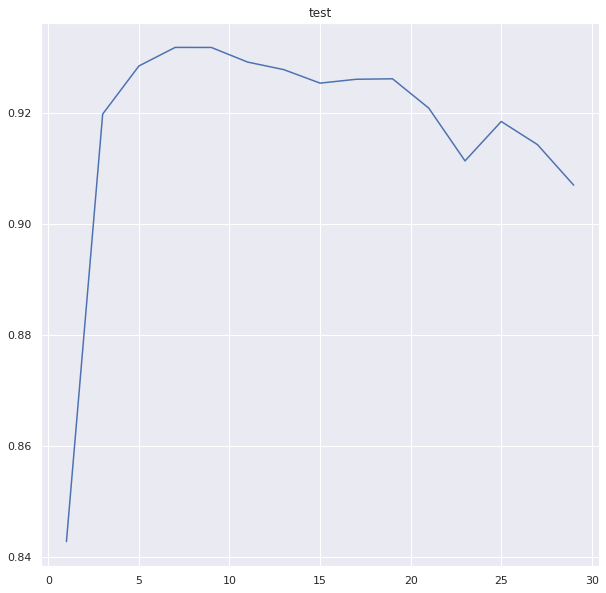

In [66]:
results = defaultdict(list)

depths = range(1, 30, 2)

for i in depths:
    boosting = Boosting(base_model_params={'max_depth': i})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    boosting.score(x_test, y_test)
    results['test'].append(boosting.score(x_test, y_test))
    results['train'].append(boosting.score(x_train, y_train))


plt.figure(figsize=(10, 10))
plt.plot(depths, results['test'])
plt.title('test')
plt.show()

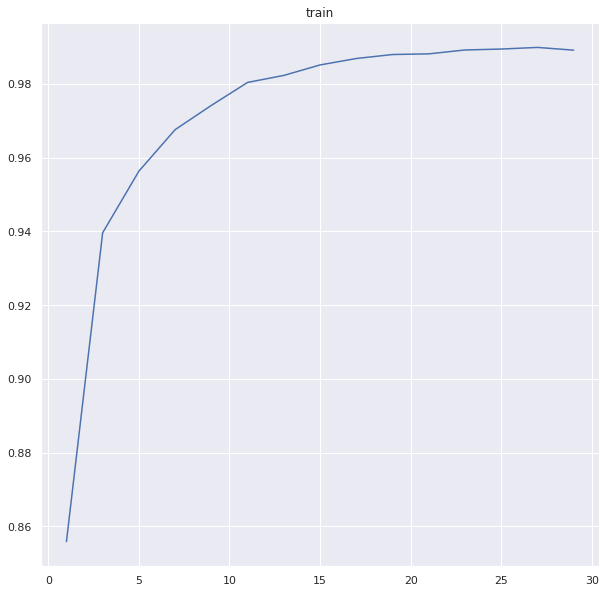

In [67]:
plt.figure(figsize=(10, 10))
plt.plot(depths, results['train'])
plt.title('train')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

На тренировочной можно заметить рост качества.
На валидационной - рост, а с какого-то момента качество начинает ухудшаться. 

Очевидно, что из-за переобучения, а из-за того, что деревься не подстроились под глубину, больше > и т.д. 

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [9]:
!pip3 install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# YOUR CODE:

import xgboost as xgb

import optuna


def objective(trial):

    param = {
        "n_estimators": trial.suggest_int("n_estimators", 5, 20),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
    }

    # bst = xgb.train(param, x_train)
    model = Boosting(**param)

    model.fit((x_train.toarray()).reshape(18825, 169),
              y_train,
              (x_valid.toarray()).reshape(2354, 169),
              y_valid)

    return model.score((x_valid.toarray()).reshape(2354, 169), y_valid)
    # return accuracy


In [52]:
# https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-12-21 19:57:55,060] A new study created in memory with name: no-name-afeec2ba-fa90-4c7a-91de-a4f39644d321
[I 2022-12-21 19:57:56,806] Trial 0 finished with value: 0.9205536571913417 and parameters: {'n_estimators': 12, 'learning_rate': 0.045312401224786886}. Best is trial 0 with value: 0.9205536571913417.
[I 2022-12-21 19:57:59,209] Trial 1 finished with value: 0.9223060854878503 and parameters: {'n_estimators': 17, 'learning_rate': 0.02391875695500127}. Best is trial 1 with value: 0.9223060854878503.
[I 2022-12-21 19:58:01,708] Trial 2 finished with value: 0.9256908143383834 and parameters: {'n_estimators': 17, 'learning_rate': 0.05624345023386074}. Best is trial 2 with value: 0.9256908143383834.
[I 2022-12-21 19:58:03,088] Trial 3 finished with value: 0.9114890013273915 and parameters: {'n_estimators': 10, 'learning_rate': 0.09330996018882748}. Best is trial 2 with value: 0.9256908143383834.
[I 2022-12-21 19:58:03,915] Trial 4 finished with value: 0.9083401379114374 and param

In [54]:
study.best_params

{'n_estimators': 19, 'learning_rate': 0.04938649262158599}

Закинем их в бустинг и посчитаем на тестовой

In [55]:
model = Boosting(**study.best_params)
model.fit(x_train, y_train, x_valid, y_valid)
model.score(x_test, y_test)

0.9268527513568239

Неплохо)

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [56]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

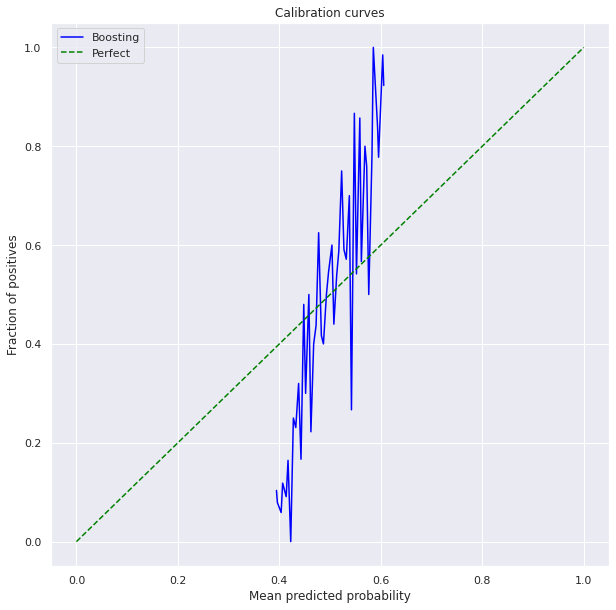

In [64]:
plt.figure(figsize=(10, 10))

true_prob, pred_prob = calibration_curve(y_test, model.predict_proba(x_test)[:, 1], n_bins=200)

plt.plot(pred_prob, true_prob, label='Boosting', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [90]:
from sklearn.preprocessing import normalize

In [91]:
@property
def feature_importances_(self):
    zero = 0
    for model in self.models:
        zero += model.feature_importances_
    zero /= len(self.models)
    zero = normalize([zero], norm='l1')[0]
    return zero

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [84]:
study.best_params

{'n_estimators': 19, 'learning_rate': 0.04938649262158599}

Прям как функция score из boost.py

Надо поделит x_train на две выборки, на первой половине обучить бустинг и сделать предсказание, на второй половине - логистическую регрессию. Сделать обеих моделях предсказание для x_train. Сложить предсказания и поделить на 2. Вроде понял всё правильно )

In [85]:
from sklearn.linear_model import LogisticRegression

In [88]:
point = x_test.shape[0] // 2
point

1176

In [89]:
model = Boosting(**study.best_params)
model.fit(x_train[1176:, :], y_train[1176:], x_valid, y_valid)


model_lr = LogisticRegression()
model_lr.fit(x_train[:1176, :], y_train[:1176])


roc_auc_score(y_test == 1, (model_lr.predict_proba(x_test)[:, 1] + model.predict_proba(x_test)[:, 1]) / 2)

0.9387791813554225

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [71]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [80]:
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

In [77]:
study.best_params

{'n_estimators': 19, 'learning_rate': 0.04938649262158599}

In [78]:
from sklearn.metrics import roc_auc_score

In [83]:
model = CatBoostClassifier(iterations=20, 
                          depth=8, 
                          learning_rate=0.04938649262158599,
                          )

model.fit(x_train, y_train)


roc_auc_score(y_test == 1, model.predict_proba(x_test)[:, 1])

0:	learn: 0.6332824	total: 32.9ms	remaining: 625ms
1:	learn: 0.5797619	total: 81.3ms	remaining: 731ms
2:	learn: 0.5357626	total: 117ms	remaining: 660ms
3:	learn: 0.5002154	total: 130ms	remaining: 518ms
4:	learn: 0.4687324	total: 151ms	remaining: 453ms
5:	learn: 0.4414433	total: 171ms	remaining: 398ms
6:	learn: 0.4191353	total: 192ms	remaining: 356ms
7:	learn: 0.3996451	total: 213ms	remaining: 320ms
8:	learn: 0.3839899	total: 244ms	remaining: 299ms
9:	learn: 0.3698000	total: 265ms	remaining: 265ms
10:	learn: 0.3573243	total: 282ms	remaining: 231ms
11:	learn: 0.3444279	total: 305ms	remaining: 203ms
12:	learn: 0.3338550	total: 328ms	remaining: 177ms
13:	learn: 0.3237727	total: 348ms	remaining: 149ms
14:	learn: 0.3168108	total: 363ms	remaining: 121ms
15:	learn: 0.3089502	total: 387ms	remaining: 96.8ms
16:	learn: 0.3031583	total: 413ms	remaining: 72.8ms
17:	learn: 0.2980529	total: 421ms	remaining: 46.8ms
18:	learn: 0.2937745	total: 429ms	remaining: 22.6ms
19:	learn: 0.2890221	total: 442ms	r

0.9332806401279752

Неплохо, апгрейднулись 0.01 :D

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?